In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn      #scikit-learn is a library for machine learning
#modcom.co.ke/datascience/ML

#machine learning breaks into two; supervised and unsupervised
#supervised; you provide the machine with data train it and let t predict based on that data on its own
#unsupervised learning; there is nothing to predict, no predicting, we do data clustering.

#supervised is breaks into two, classification and regression
#pima indians diabetes dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.isnull().sum()

num_preg          0
glucose_conc      0
diastolic_bp      0
skin_thickness    0
insulin           0
bmi               0
diab_pred         0
age               0
diabetes          0
dtype: int64

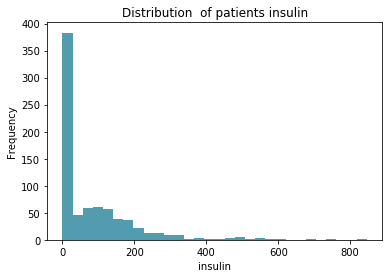

In [9]:
fig, ax = plt.subplots()
ax.hist(df['insulin'], color='#539caf', bins=30)#bins are not a must because the
 # Label the axes and provide a title
ax.set_title("Distribution  of patients insulin")
ax.set_xlabel("insulin")
ax.set_ylabel("Frequency")
plt.show()


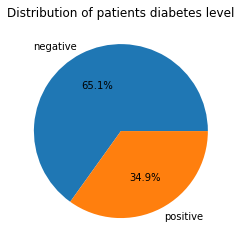

(768, 9)


In [10]:
#pie chart
df["diabetes"].replace(1, "positive", inplace=True)
df["diabetes"].replace(0, "negative", inplace=True)
fig, ax = plt.subplots()
df.groupby('diabetes').size().plot(kind='pie',autopct='%1.1f%%')
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Distribution of patients diabetes level")
plt.show()
print(df.shape)


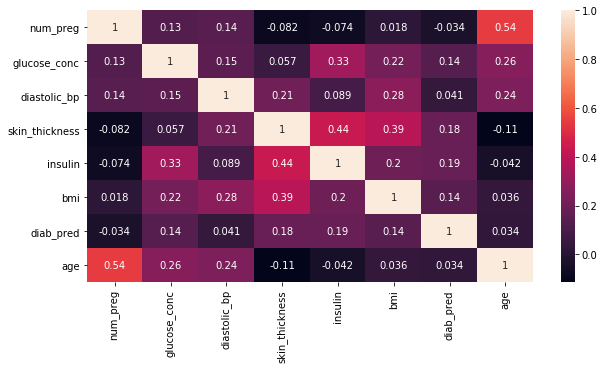

In [11]:
#heat map
import seaborn as sb
plt.figure(figsize = (10,5))
sb.heatmap(df.corr(), annot=True)
plt.show()


In [13]:
df["insulin"].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: insulin, dtype: float64

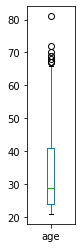

In [14]:
#Box plot
df["age"].plot(kind="box", subplots=True, layout=(1,6), sharex=False, sharey=True)
plt.show()


In [21]:
#predicting
array= df.values
X = array[:,0:8] #0 to 7
Y = array[:, 8] #target variable / outcome

#split to train, test
#x trai and y train will be 70%
from sklearn import model_selection
#0.30 is the testing split percentage, for testing data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size=0.30, random_state=10)


In [22]:
#
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC


In [23]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train) #learning process

#now lets ask the model to predict x test, we hide y test
predictions = model.predict(X_test)
print(predictions)

print(accuracy_score(Y_test, predictions))        #accuracy_score is imported
print(classification_report(Y_test, predictions)) #classification report is imported
print(confusion_matrix(Y_test, predictions))      #imported


['positive' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'negative' 'negative' 'positive' 'positive' 'negative'
 'negative' 'positive' 'negative' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative' 'positive' 'positive'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'negative' 'negative' 'positive' 'positive' 'negative'
 'negative' 'positive' 'negative' 'negative' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'positive' 'positive' 'negative' 'positive' 'negat

In [24]:
#new observation
newobservation = model.predict([[2,70,80,5,42,140,26,180],[2,45,80,5,42,400,26,29]])
print(newobservation)


['positive' 'positive']


In [ ]:
#model improvement
#new data set
#https://modcom.co.ke/flask/DataScience/bank.csv     #paste it on your code and convert it to 0 and 1s before exposing it to ML
#pool the data, fill empty
#https://modcom.co.ke/flask/DataScience/iris.csv
#finish ML, hypothesis

#feature selection
#from sklearn.feature_selection import SelectKBest, chi2

#best = SelectKBest(score_func=chi2, k=2)
#fit = test.fit(X, Y)
#features = var.transform(X)
#print("selected: ", features)